In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('walmart_data.csv')

### 1. Defining Problem Statement and Analysing basic metrics

The Walmart project objectives are to apply scalable data analytics tool, techniques and Central limit theorem to gain useful insights and to support decision making. Most project will source open data from the web. The activities include data extraction, preprocessing(missing value and outlier detection) using python numpy and pandas, data visualization using matplotlib and seaborn libraries & confidence interval and CLT using scipy.stats.

#### Basic Metrics:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [5]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


#### 1.1 1.	Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary

In [6]:
df.shape

(550068, 10)

In [7]:
df.ndim

2

In [8]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [9]:
df.describe(include='object').T

,count,unique,top,freq
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821


#### 1.2.	Non-Graphical Analysis: Value counts and unique attributes 

In [10]:
df['User_ID'].value_counts()[:10]

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
1003618     767
1001150     752
1001015     740
1005795     729
1005831     727
Name: User_ID, dtype: int64

In [11]:
df['User_ID'].nunique()

5891

In [12]:
df['Product_ID'].value_counts()[:15]

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
P00184942    1440
P00046742    1438
P00058042    1422
P00059442    1406
P00145042    1406
P00237542    1394
P00255842    1383
P00117942    1364
P00110942    1360
P00010742    1350
Name: Product_ID, dtype: int64

In [13]:
df['Product_ID'].nunique()

3631

In [14]:
df['Product_ID'].unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00370293',
       'P00371644', 'P00370853'], dtype=object)

In [15]:
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [16]:
df['Gender'].nunique()

2

In [17]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [18]:
df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [19]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [20]:
df['Age'].nunique()

7

In [21]:
df['Occupation'].value_counts().sort_index()

0     69638
1     47426
2     26588
3     17650
4     72308
5     12177
6     20355
7     59133
8      1546
9      6291
10    12930
11    11586
12    31179
13     7728
14    27309
15    12165
16    25371
17    40043
18     6622
19     8461
20    33562
Name: Occupation, dtype: int64

In [22]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [23]:
df['Occupation'].nunique()

21

In [24]:
df['City_Category'].value_counts().sort_index()

A    147720
B    231173
C    171175
Name: City_Category, dtype: int64

In [25]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [26]:
df['City_Category'].nunique()

3

In [27]:
df['Stay_In_Current_City_Years'].value_counts().sort_index()

0      74398
1     193821
2     101838
3      95285
4+     84726
Name: Stay_In_Current_City_Years, dtype: int64

In [28]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [29]:
df['Stay_In_Current_City_Years'].nunique()

5

In [30]:
df['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [31]:
df['Marital_Status'].unique()

array([0, 1], dtype=int64)

In [32]:
df['Marital_Status'].nunique()

2

In [33]:
df['Product_Category'].value_counts().sort_index()

1     140378
2      23864
3      20213
4      11753
5     150933
6      20466
7       3721
8     113925
9        410
10      5125
11     24287
12      3947
13      5549
14      1523
15      6290
16      9828
17       578
18      3125
19      1603
20      2550
Name: Product_Category, dtype: int64

In [34]:
df['Product_Category'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [35]:
df['Product_Category'].nunique()

20

In [36]:
df['Purchase'].value_counts()

7011     191
7193     188
6855     187
6891     184
7012     183
        ... 
23491      1
18345      1
3372       1
855        1
21489      1
Name: Purchase, Length: 18105, dtype: int64

In [37]:
df['Purchase'].unique()

array([ 8370, 15200,  1422, ...,   135,   123,   613], dtype=int64)

In [38]:
df['Purchase'].nunique()

18105

#### 1.3.	Visual Analysis - Univariate & Bivariate

#### 1.3.1 For continuous variable(s): Distplot, countplot, histogram

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


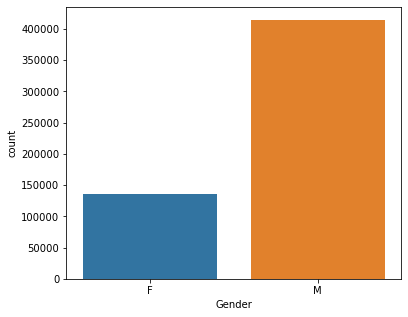

In [346]:
plt.figure(figsize=(6,5))
sns.countplot(data=df, x='Gender')
plt.show()

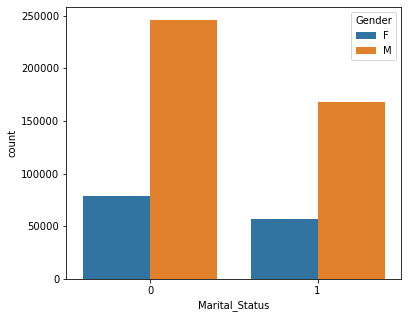

In [348]:
plt.figure(figsize=(6,5))
sns.countplot(data=df, x='Marital_Status', hue='Gender')
plt.show()

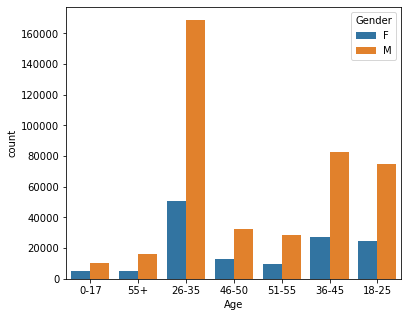

In [345]:
plt.figure(figsize=(6,5))
sns.countplot(data=df, x='Age', hue='Gender')
plt.show()

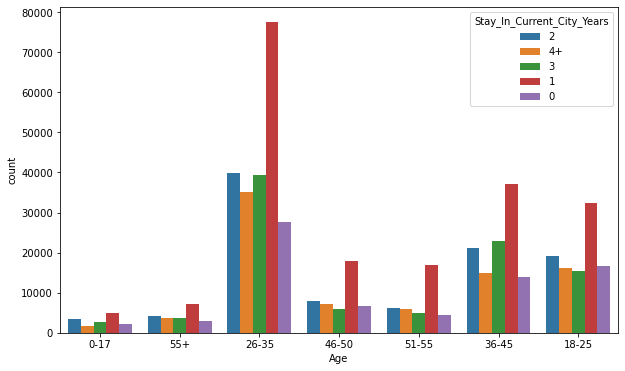

In [41]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Age', hue='Stay_In_Current_City_Years')
plt.show()

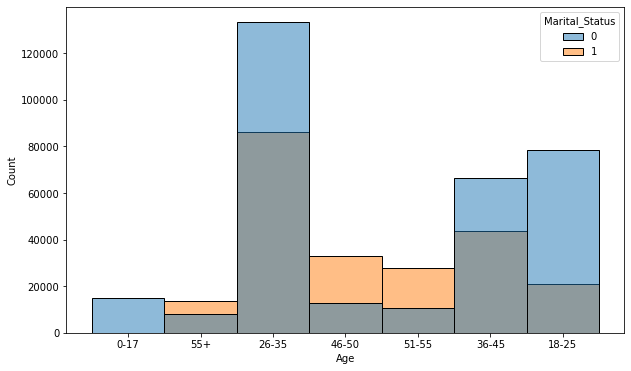

In [42]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Age', hue='Marital_Status')
plt.show()

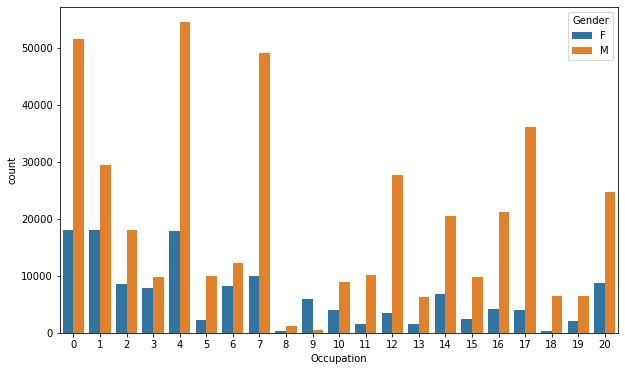

In [43]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Occupation', hue='Gender')
plt.show()

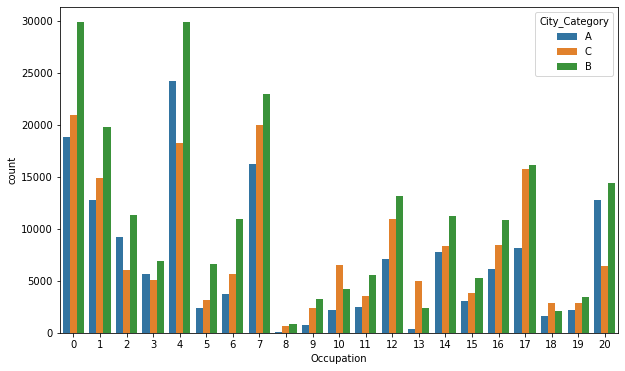

In [335]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Occupation', hue='City_Category')
plt.show()

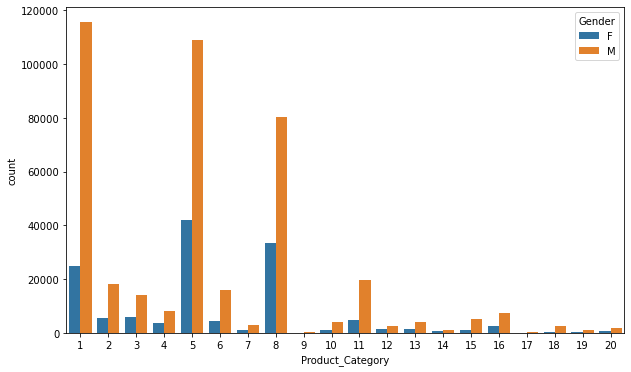

In [45]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Product_Category', hue='Gender')
plt.show()

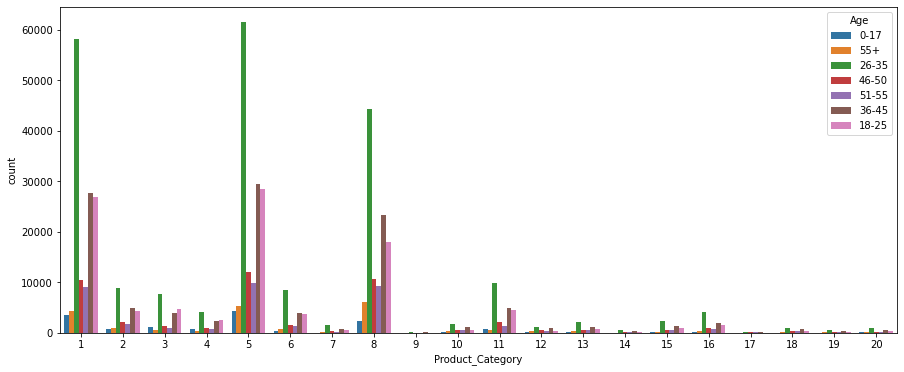

In [46]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='Product_Category', hue='Age')
plt.show()

C:\Users\SATHEESHWARAN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


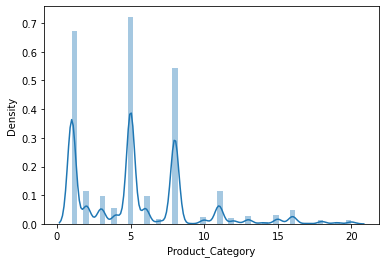

In [47]:
sns.distplot(df['Product_Category'])
plt.show()

C:\Users\SATHEESHWARAN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


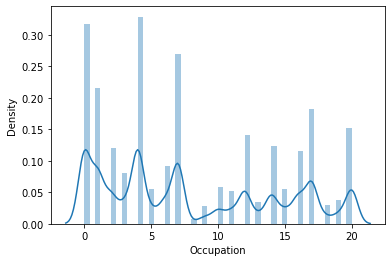

In [48]:
sns.distplot(df['Occupation'])
plt.show()

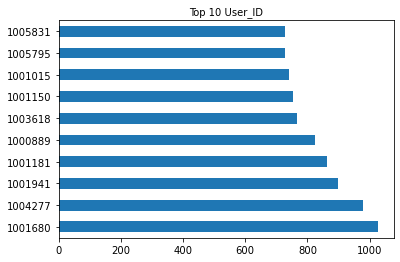

In [49]:
plt.title('Top 10 User_ID',fontsize=10)
df['User_ID'].value_counts()[:10].plot(kind='barh')
plt.show()

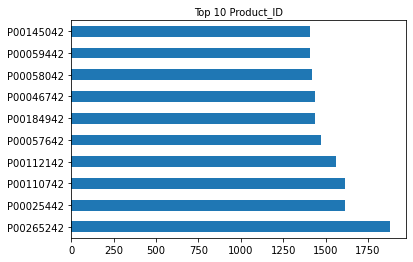

In [50]:
plt.title('Top 10 Product_ID',fontsize=10)
df['Product_ID'].value_counts()[:10].plot(kind='barh')
plt.show()

#### For categorical variable(s): Boxplot

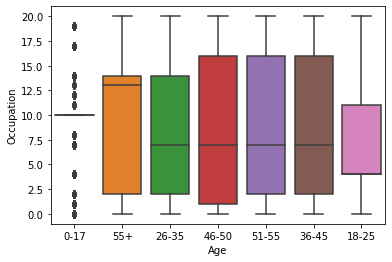

In [51]:
plt.title('')
sns.boxplot(x='Age', y='Occupation', data=df)
plt.show()

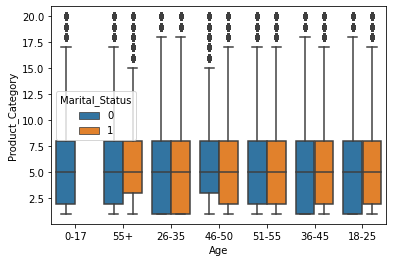

In [53]:
plt.title('')
sns.boxplot(x='Age', y='Product_Category',hue='Marital_Status', data=df)
plt.show()

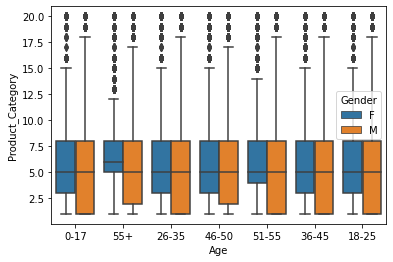

In [54]:
plt.title('')
sns.boxplot(x='Age', y='Product_Category',hue='Gender', data=df)
plt.show()

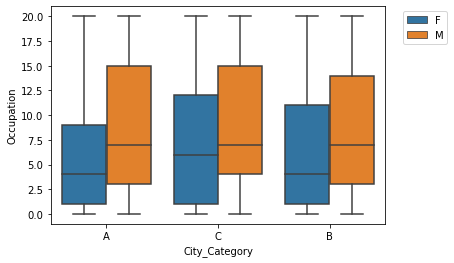

In [55]:
plt.title('')
sns.boxplot(x='City_Category', y='Occupation',hue='Gender', data=df)
plt.legend(bbox_to_anchor =(1.20, 1.0),loc='upper right')
plt.show()

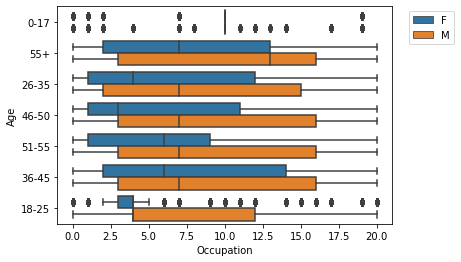

In [57]:
plt.title('')
sns.boxplot(x='Occupation', y='Age',hue= 'Gender' ,data=df)
plt.legend(bbox_to_anchor =(1.20, 1),loc='upper right')
plt.show()

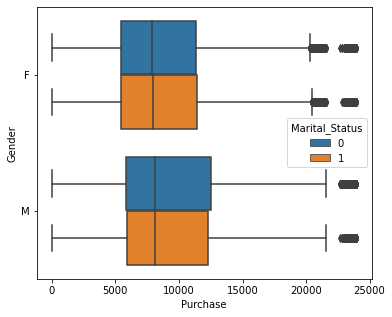

In [58]:
plt.figure(figsize=(6,5))
sns.boxplot(x='Purchase',y='Gender',hue='Marital_Status', data=df)
plt.show()

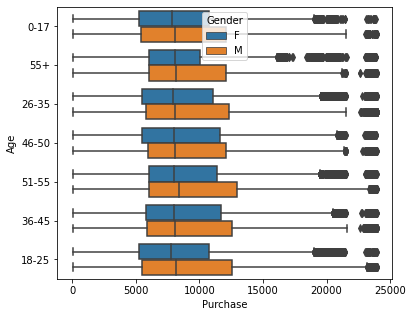

In [59]:
plt.figure(figsize=(6,5))
sns.boxplot(x='Purchase',y='Age',hue='Gender', data=df)
plt.show()

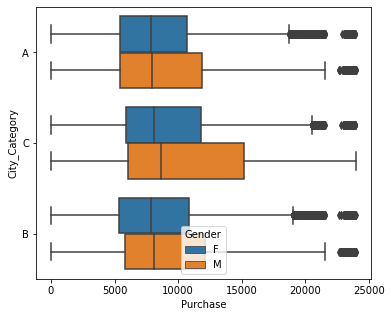

In [60]:
plt.figure(figsize=(6,5))
sns.boxplot(x='Purchase',y='City_Category',hue='Gender', data=df)
plt.show()

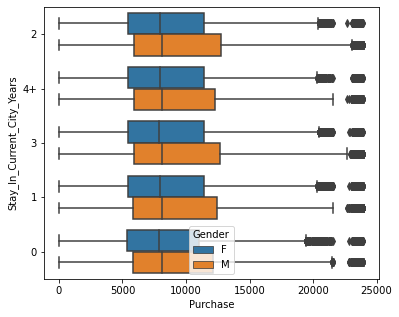

In [340]:
plt.figure(figsize=(6,5))
sns.boxplot(x='Purchase',y='Stay_In_Current_City_Years',hue='Gender', data=df)
plt.show()

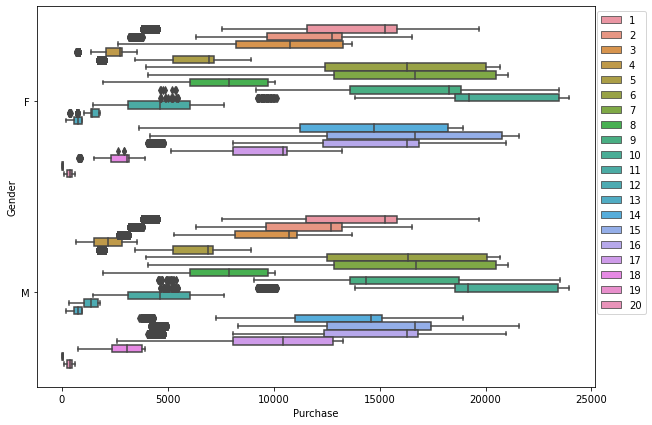

In [62]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Purchase',y='Gender',hue='Product_Category', data=df)
plt.legend(bbox_to_anchor =(1.1, 1),loc='upper right')
plt.show()

In [343]:
df['Product_Category'].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

#### For correlation: Heatmaps, Pairplots

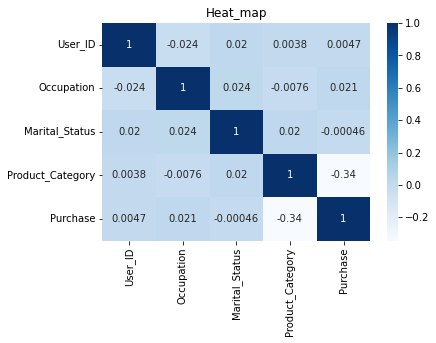

In [63]:
plt.title('Heat_map', fontsize=12)
sns.heatmap(df.corr(),cmap= "Blues", annot=True)
plt.show()

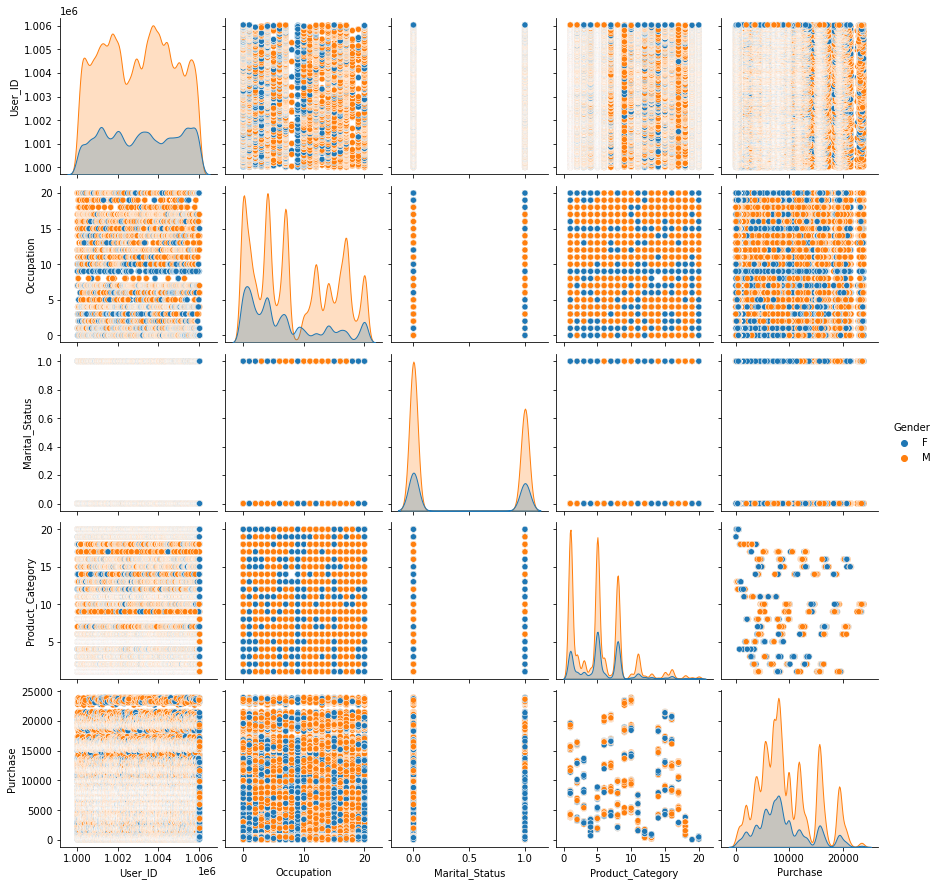

In [64]:
sns.pairplot(data=df, hue='Gender')
plt.show()

### 2.	Missing Value & Outlier Detection 

In [79]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [80]:
df.isnull().values.any()

False

In [81]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


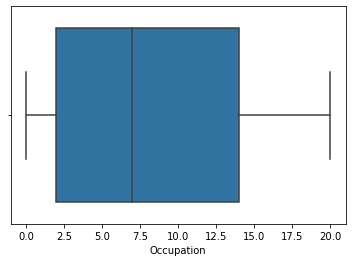

In [86]:
#Outlier detection
sns.boxplot(data=df, x='Occupation')
plt.show()

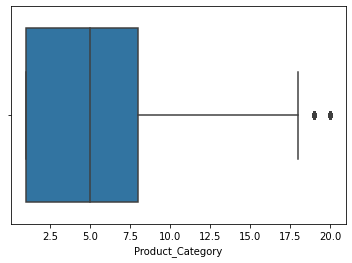

In [92]:
plt.title('')
sns.boxplot(data=df, x='Product_Category')
plt.show()

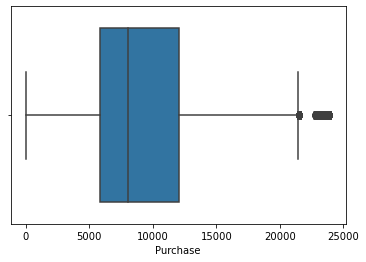

In [93]:
plt.title('')
sns.boxplot(data=df, x='Purchase')
plt.show()

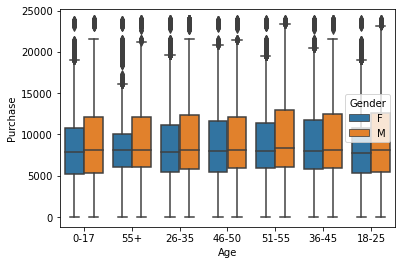

In [95]:
#multivariate outlier detection
plt.title('')
sns.boxplot(data=df, x='Age', y='Purchase', hue='Gender')
plt.show()

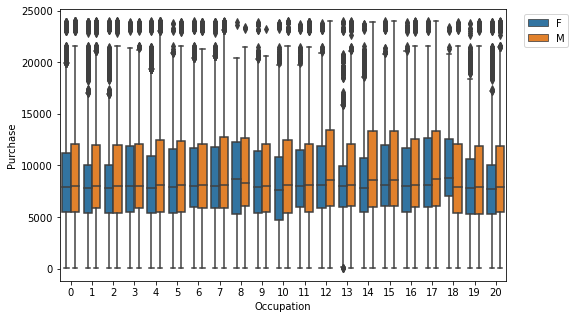

In [99]:
plt.figure(figsize=(8,5))
plt.title('')
sns.boxplot(data=df, x='Occupation', y='Purchase', hue='Gender')
plt.legend(bbox_to_anchor =(1.15, 1),loc='upper right')
plt.show()

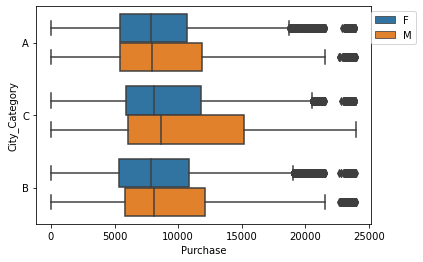

In [105]:
#plt.figure(figsize=(8,5))
plt.title('')
sns.boxplot(data=df, x='Purchase', y='City_Category', hue='Gender')
plt.legend(bbox_to_anchor =(1.15, 1),loc='upper right')
plt.show()

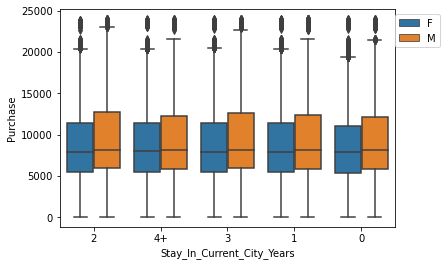

In [104]:

plt.title('')
sns.boxplot(data=df, x='Stay_In_Current_City_Years', y='Purchase', hue='Gender')
plt.legend(bbox_to_anchor =(1.15, 1),loc='upper right')
plt.show()

### 3.Business Insights based on Non- Graphical and Visual Analysis 

#### 3.1 Comments on the range of attributes

1. User_ID: It contains 5891 unique User_IDs, its range is 1000001 to 1006040.
2. Product_ID: which contains 3631 Product_ID, its range('P00000142','P0099942').
3. Gender -- which conatins gender details of customers whether Male or Female.
4. Age -- which contains age of cutomers in the interval of ['0-17','18-25','26-35','36-45','46-50','55+']
5. Occupation -- which contains Occupation range between 1 to 20 of customers.
6. City_Category -- It shows details of city in the range(A to C)
7. Stay_In_Current_City_Years -- It show customers stay in current city range between 1 to 5+.
8. Marital Status -- which contains marital status of customers-- married or unmarried.
9. Product_Category -- It contains category of product that purchased by customer. It's range is 1 to 20.
10. Purchase:  It shows purchase amount range between 12 to 23961  of customers.  

#### 3.2 Comments on the distribution of the variables and relationship between them

1. Product_ID & Age -- Using these we can find customers of certain age purchased which product.
2. Age & Stay_In_Current_City_Years -- Using these we can find the customer age group who stay same place for years.
3. Age & Gender -- Using these we can find age wise classification based on gender.
4. Occupation & City_Category -- Using these values we can find customers occupation and their city.
5. Purchase, Gender & Marital_Status -- Uisng these we can find customer purchase amount based on their gender and maritalstatus.
6. Purchase, City_Category & Gender -- Using these we can find customer purchse amount based on their gender and city.

#### 3.3 Comments for each univariate and bivariate plot

#Univariate
1. countplot(Age) -- It display customers age_interval count based on gender.
2. countplot(Gender) -- It shows number of customers based on Gender.
3. Countplot(Age) -- It display customers age interval count based on Stay_In_Current_City_Years.
4. histpl0t(Age) -- It displays customer age_interval based on maritalstatus.
5. distplot(Occupation) --It show customers occupation density.

#Bivariate 
1. Age, Occupation -- This plot shows the distribution of quantitative data in a way that facilitates comparisons between Age and Occupation based on product purchased.
2. Age, Product_Category, Gender: This plot shows comaprison between customers Age, product_Category, gender on the basis of customer purchase.
3. Purchase, Gender, Maritalstatus: This plot shows the distribution of quantitative data in a way that facilitates comparisons between Gender and MaritalStatus based on customer purchase.
4. Purchase, Age, Gender: This plot shows comaprison between customers purchase, Age on the basis of gender.

### 4.	Answering questions 

#### 4.1.	Are women spending more money per transaction than men? Why or Why not? 

In [146]:
df_mpt=df.groupby(['User_ID','Gender'])['Purchase'].sum()

In [149]:
df_mpt=df_mpt.reset_index()

In [150]:
df_mpt.head()

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001


In [151]:
df_mpt['Gender'].value_counts()

M    4225
F    1666
Name: Gender, dtype: int64

In [154]:
m_mean=df_mpt[df_mpt['Gender']=='M']['Purchase'].mean()
m_mean

925344.4023668639

In [155]:
f_mean=df_mpt[df_mpt['Gender']=='F']['Purchase'].mean()
f_mean

712024.3949579832

#### Ans: women spending less money per transaction than men.

#### 4.2.	Confidence intervals and distribution of the mean of the expenses by female and male customers 

In [162]:
df_m=df_mpt[df_mpt['Gender']=='M'].reset_index(drop=True)
df_f=df_mpt[df_mpt['Gender']=='F'].reset_index(drop=True)
print(df_m[:5])
print(df_f[:5])

   User_ID Gender  Purchase
0  1000002      M    810472
1  1000003      M    341635
2  1000004      M    206468
3  1000005      M    821001
4  1000007      M    234668
   User_ID Gender  Purchase
0  1000001      F    334093
1  1000006      F    379930
2  1000010      F   2169510
3  1000011      F    557023
4  1000016      F    150490


In [167]:
print("mean:",df_m['Purchase'].mean())
print("std:",df_m['Purchase'].std())

mean: 925344.4023668639
std: 985830.100795388


C:\Users\SATHEESHWARAN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SATHEESHWARAN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


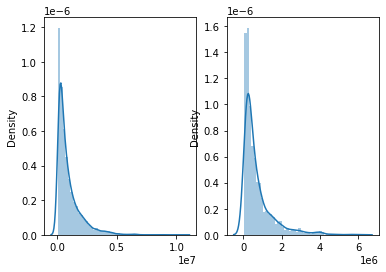

In [220]:
plt.subplot(1,2,1)
plt.title('')
sns.distplot(x=df_m['Purchase'])
plt.subplot(1,2,2)
plt.title('')
sns.distplot(x=df_f['Purchase'])
plt.show()

In [227]:
# Male, Female
m_s_size=3000
f_s_size= 1000

m_mean=[df_m['Purchase'].sample(m_s_size).mean() for i in range(1000)]
f_mean=[df_f['Purchase'].sample(f_s_size).mean() for i in range(1000)]


C:\Users\SATHEESHWARAN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SATHEESHWARAN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


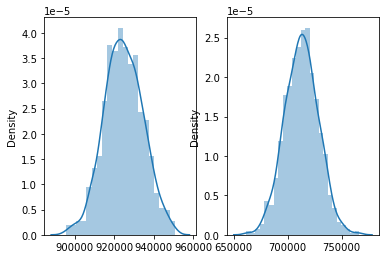

In [175]:
plt.subplot(1,2,1)
plt.title('')
sns.distplot(x=m_mean)
plt.subplot(1,2,2)
plt.title('')
sns.distplot(x=f_mean)
plt.show()

In [204]:
print("Male-- mean of sample mean_value for given s_size(3000):",np.mean(m_mean))
print("Female-- mean of sample mean_value for given s_size(1000):",np.mean(f_mean))

Male-- mean of sample mean_value for given s_size(3000): 924802.6097459999
Female-- mean of sample mean_value for given s_size(1000): 712697.4088580001


In [212]:
print("mean for male:",round(df_m['Purchase'].mean(),2))
print("std for male:",round(df_m['Purchase'].std(),2))
print("mean for female:",round(df_f['Purchase'].mean(),2))
print("std for female:",round(df_f['Purchase'].std(),2))

mean for male: 925344.4
std for male: 985830.1
mean for female: 712024.39
std for female: 807370.73


In [229]:
m_margin_error=1.96*df_m['Purchase'].std()/np.sqrt(len(df_m))
male_mean=df_m['Purchase'].mean()
m_lower_lim=male_mean-m_margin_error
m_upper_lim=male_mean+m_margin_error

f_margin_error=1.96*df_f['Purchase'].std()/np.sqrt(len(df_f))
female_mean=df_f['Purchase'].mean()
f_lower_lim=female_mean-f_margin_error
f_upper_lim=female_mean+f_margin_error

In [273]:
print('Confidence Interval of means for male:',round(m_lower_lim,2),',',round(m_upper_lim,2))
print('Confidence Interval of means for female:',round(f_lower_lim,2),',',round(f_upper_lim,2))

Confidence Interval of means for male: 895617.83 , 955070.97
Confidence Interval of means for female: 673254.77 , 750794.02


#### 4.3.	Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements? 

Based on the above result, confidence intervals of average male and female spending not overlapping. Using this conclusion walmart need to improve female customer base.

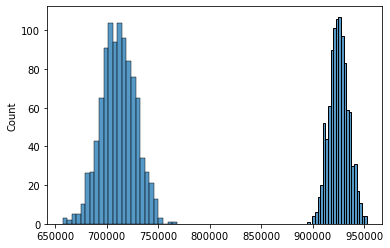

In [236]:
#refer this-- fro conclusion
sns.histplot(m_mean)
sns.histplot(f_mean)
plt.show()

#### 4.4.	Confidence intervals and distribution of the mean of the expenses by Married vs Unmarried 

In [245]:
df_marriage=df.groupby(['User_ID','Marital_Status'])['Purchase'].sum()
df_marriage=df_marriage.reset_index()

In [247]:
df_marriage.head(5)

,User_ID,Marital_Status,Purchase
0,1000001,0,334093
1,1000002,0,810472
2,1000003,0,341635
3,1000004,1,206468
4,1000005,1,821001


In [248]:
df_marriage['Marital_Status'].value_counts()

0    3417
1    2474
Name: Marital_Status, dtype: int64

In [250]:
# s-- Single/Unmarried **** p--Partnered/Married
df_s=df_marriage[df_marriage['Marital_Status']==0].reset_index(drop=True)
df_p=df_marriage[df_marriage['Marital_Status']==1].reset_index(drop=True)
print(df_s[:5])
print(df_p[:5])

   User_ID  Marital_Status  Purchase
0  1000001               0    334093
1  1000002               0    810472
2  1000003               0    341635
3  1000006               0    379930
4  1000009               0    594099
   User_ID  Marital_Status  Purchase
0  1000004               1    206468
1  1000005               1    821001
2  1000007               1    234668
3  1000008               1    796593
4  1000010               1   2169510


In [284]:
print('Mean purchase value of unmarried customer:',round(df_s['Purchase'].mean(),2))
print('std purchase value of unmarried customer:',round(df_s['Purchase'].std(),2))
print('Mean purchase value of married customer:',round(df_p['Purchase'].mean(),2))
print('std purchase value of married customer:',round(df_p['Purchase'].std(),2))

Mean purchase value of unmarried customer: 880575.78
std purchase value of unmarried customer: 949436.25
Mean purchase value of married customer: 843526.8
std purchase value of married customer: 935352.12


C:\Users\SATHEESHWARAN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SATHEESHWARAN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


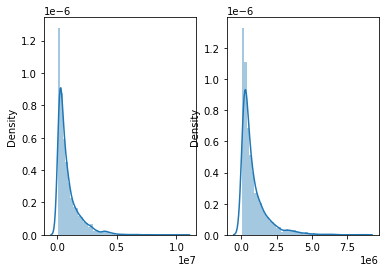

In [257]:
plt.subplot(1,2,1)
plt.title('')
sns.distplot(x=df_s['Purchase'])
plt.subplot(1,2,2)
plt.title('')
sns.distplot(x=df_p['Purchase'])
plt.show()

In [258]:
#sample size:- 0-3000 & 1-2000
s_mean=[df_s['Purchase'].sample(3000).mean() for i in range(1000)]
p_mean=[df_p['Purchase'].sample(2000).mean() for i in range(1000)]

C:\Users\SATHEESHWARAN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SATHEESHWARAN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


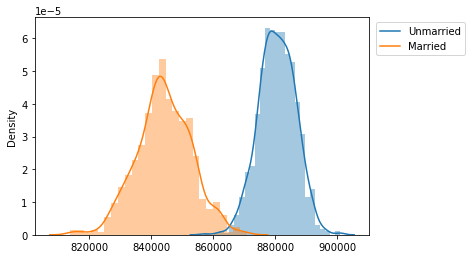

In [271]:
sns.distplot(s_mean)
sns.distplot(p_mean)
plt.legend(['Unmarried','Married'],bbox_to_anchor =(1.30, 1.0),loc='upper right')
plt.show()

In [268]:
print("Unmarried-- mean of sample mean_value for given s_size(3000):",np.mean(s_mean))
print("Married-- mean of sample mean_value for given s_size(2000):",np.mean(p_mean))

Unmarried-- mean of sample mean_value for given s_size(3000): 880648.4073866666
Married-- mean of sample mean_value for given s_size(2000): 844156.686956


In [279]:
s_margin_error=1.96*df_s['Purchase'].std()/np.sqrt(len(df_s))
unmarired_mean=df_s['Purchase'].mean()
s_lower_lim=unmarired_mean-s_margin_error
s_upper_lim=unmarired_mean+s_margin_error

p_margin_error=1.96*df_p['Purchase'].std()/np.sqrt(len(df_p))
married_mean=df_p['Purchase'].mean()
p_lower_lim=married_mean-p_margin_error
p_upper_lim=married_mean+p_margin_error

In [280]:
print('Confidence Interval of means for unmarried:',round(s_lower_lim,2),',',round(s_upper_lim,2))
print('Confidence Interval of means for married:',round(p_lower_lim,2),',',round(p_upper_lim,2))

Confidence Interval of means for unmarried: 848741.18 , 912410.38
Confidence Interval of means for married: 806668.83 , 880384.76


#### 4.5.	Confidence intervals and distribution of the mean of the expenses by Age 

In [287]:
df_Age=df.groupby(['User_ID','Age'])['Purchase'].sum().reset_index()

In [289]:
df_Age['Age'].value_counts()

26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64

In [350]:
age_mean={}
ages=['0-17','18-25','26-35','36-45','46-50','55+']
for i in ages:
    age_mean[i]=[]
for i in ages:
    for j in range(1000):
        mean=df_Age[df_Age['Age']==i].sample(200)['Purchase'].mean()
        age_mean[i].append(mean)


In [305]:

for i in ages:
    df_Ages=df_Age[df_Age['Age']==i]
    age_margin_error=1.96*df_Ages['Purchase'].std()/np.sqrt(len(df_Ages))
    mean_age = df_Ages['Purchase'].mean()
    age_lower_lim = mean_age - age_margin_error
    age_upper_lim = mean_age + age_margin_error
    print('Confidence Interval of means:'+i,'-->',age_lower_lim, age_upper_lim)

Confidence Interval of means:0-17 --> 527662.4567141125 710073.1671390985
Confidence Interval of means:18-25 --> 801632.7751885153 908093.4642876306
Confidence Interval of means:26-35 --> 945034.4236487859 1034284.2105450766
Confidence Interval of means:36-45 --> 823347.8021361914 935983.6186007408
Confidence Interval of means:46-50 --> 713505.6344444095 871591.9286441028
Confidence Interval of means:55+ --> 476948.2595905849 602446.2296567269


### 5.	Final Insights (Illustrate the insights based on exploration and CLT)

#### 5.1	Comments on the distribution of the variables and relationship between them

1. User_ID: It has user_id of customers.
2. Purchase: This contains purchase amount of product purchased by user_id.
3. Gender: This shows customers gender details.
4. Marital_Status: This contains customers maritalstatus-- married or unmarried.
5. Age: It contains age_interval of customers.

Relationship between them:
1. User_ID, Gender, Purchase: Uisng these we can find customer purchase amount based on their User_ID and Gender.
2. User_ID, Marital_Status, Purchase: Uisng these we can find customer purchase amount based on their User_ID and Maritalstatus.
3. User_ID, Age, Purchase: Uisng these we can find customer purchase amount based on their User_ID and Age.

#### 5.2	Comments for each univariate and bivariate plots

1. distplot(df_f['Purchase']) -- It displays purchase density based on user_id and gender.
2. histplot(m_mean) -- This show approximate representation of the distribution of mean.
3. distplot(df_s['Purchase']) -- It displays purchase density based on user_id and maritalstatus.
4. distplot(s_mean) -- It displays mean density on the basis of user_id and maritalstatus(unmarried).

#### 5.3	Comments on different variables when generalizing it for Population

1. Gender: Sample_size for men and women(3000&1000) respectively. By using this we can find mean and standard_deviation of purchase based on gender and user_id.
2. Marital_Status: Sample_size for unmarried and married (3000 & 2000) respectively. By using this we can find mean and standard_deviation of purchase based on maritalstatus and user_id.
3. Age: Sample_size for age_interval (200) respectively. By using this we can find mean and standard_deviation of purchase based on age_interval and user_id. 

### 6. Business Insights:

1. Male customers purchase more than female customers.
2. Age 26-35 & 36-45 customers in these age group were high when compare to other.
3. Mean value of purchase is 9263.96
4. Product category 1, 5, 8 are purchased high when compared to others.
5. 4,0,7-- MALE and 0,1,4 -- FEMALE, in these Occupation customers were high.
6. Purchase mean value of male customer is 51--55, Purchase mean value of female customer is 55+.
7. People in city 'C' purchase more than others.
8. Male customers who stay in same city for 2 years purchase more. 
9. Unmarried customers purchased more than married customers.

### 7. Recommendations:

1. Increase awareness about products in product category to improve sales products other than 1,5,8.
2. Improve Female customers base by promotions, exclusive offers on 'Women's day', 'Mother's day', etc.
3. Promote new offers to attract customers in age_interval other than 26-35 & 36-45.
4. Focus more on the city A & B to improve the revenue where performance is low, and maintain customer base in C as well.
5. Improve offers to the married customers and increase their base to increase revenue